In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
dataset = pd.read_csv(r"/Users/darshan/Documents/ML/Data/loan.csv")
dataset.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0
6,6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,$3849.0
7,7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,$5540.0
8,8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,$5532.0
9,9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,$23809.0


In [3]:
dataset.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [25]:
en_data = dataset[['Self_Employed']]
pd.get_dummies(en_data)

,Self_Employed_No,Self_Employed_Yes
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
495,True,False
496,True,False
497,True,False
498,False,True


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ar = ohe.fit_transform(en_data).toarray()
dataset[['en_Self_Employed','en_Self_Employed_No','en_Self_Employed_Yes']] = pd.DataFrame(ar,columns=['Self_Employed','Self_Employed_No','Self_Employed_Yes'])
dataset


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,...,Credit_History,Property_Area,Loan_Status,Total_Income,x,y,z,en_Self_Employed,en_Self_Employed_No,en_Self_Employed_Yes
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,...,1.0,Urban,Y,$5849.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,...,1.0,Rural,N,$6091.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,...,1.0,Urban,Y,$3000.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,...,1.0,Urban,Y,$4941.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,...,1.0,Urban,Y,$6000.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,...,1.0,Semiurban,Y,$4239.0,1.0,0.0,0.0,1.0,0.0,0.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,...,1.0,Rural,Y,$4300.0,1.0,0.0,0.0,1.0,0.0,0.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,...,NaN,Urban,Y,$7482.0,1.0,0.0,0.0,1.0,0.0,0.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,...,1.0,Semiurban,Y,$2895.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
dataset.isnull().sum()

Unnamed: 0               0
Loan_ID                  0
Gender                   9
Married                  3
Dependents              12
Education                0
Self_Employed           27
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              18
Loan_Amount_Term        14
Credit_History          41
Property_Area            0
Loan_Status              0
Total_Income             0
x                        0
y                        0
z                        0
en_Self_Employed         0
en_Self_Employed_No      0
en_Self_Employed_Yes     0
dtype: int64

/var/folders/6y/1c9k774d7ydb1hdm2syn9kr40000gn/T/ipykernel_74952/1408533801.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["en_Self_Employed_No"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/6y/1c9k774d7ydb1hdm2syn9kr40000gn/T/ipykernel_74952/1408533801.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

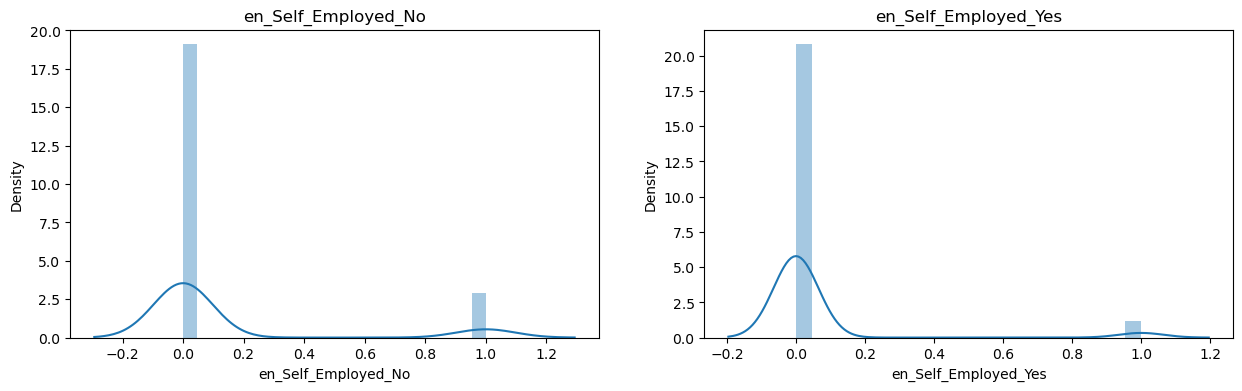

In [36]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("en_Self_Employed_No")
sns.distplot(dataset["en_Self_Employed_No"])

plt.subplot(1,2,2)
plt.title("en_Self_Employed_Yes")
sns.distplot(dataset["en_Self_Employed_Yes"])
plt.show()

/var/folders/6y/1c9k774d7ydb1hdm2syn9kr40000gn/T/ipykernel_74952/2723155581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'ApplicantIncome'}, xlabel='ApplicantIncome', ylabel='Density'>

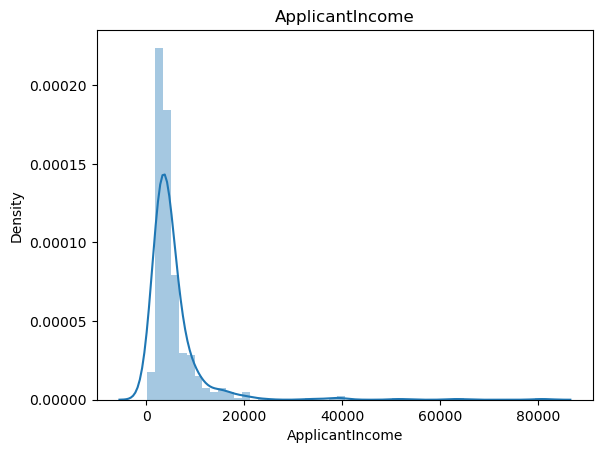

In [37]:
plt.title("ApplicantIncome")
sns.distplot(dataset["ApplicantIncome"])


In [41]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(dataset[['ApplicantIncome']])
dataset['min_max_ApplicantIncome'] = pd.DataFrame(mm.transform(dataset[['ApplicantIncome']]))
dataset

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,...,Property_Area,Loan_Status,Total_Income,x,y,z,en_Self_Employed,en_Self_Employed_No,en_Self_Employed_Yes,min_max_ApplicantIncome
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,...,Urban,Y,$5849.0,1.0,0.0,0.0,1.0,0.0,0.0,0.070489
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,...,Rural,N,$6091.0,1.0,0.0,0.0,1.0,0.0,0.0,0.054830
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,...,Urban,Y,$3000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.035250
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,...,Urban,Y,$4941.0,1.0,0.0,0.0,1.0,0.0,0.0,0.030093
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,...,Urban,Y,$6000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.072356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,...,Semiurban,Y,$4239.0,1.0,0.0,0.0,1.0,0.0,0.0,0.039283
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,...,Rural,Y,$4300.0,1.0,0.0,0.0,1.0,0.0,0.0,0.030303
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,...,Urban,Y,$7482.0,1.0,0.0,0.0,1.0,0.0,0.0,0.055349
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,...,Semiurban,Y,$2895.0,0.0,1.0,0.0,0.0,1.0,0.0,0.033952


In [42]:
dataset.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x,y,z,en_Self_Employed,en_Self_Employed_No,en_Self_Employed_Yes,min_max_ApplicantIncome
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137,0.814000,0.13200,0.054000,0.814000,0.13200,0.054000,0.066093
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068,0.389496,0.33883,0.226244,0.389496,0.33883,0.226244,0.080590
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.00000,0.000000,0.033698
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.00000,0.000000,0.045813
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.00000,0.000000,0.069437
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


/var/folders/6y/1c9k774d7ydb1hdm2syn9kr40000gn/T/ipykernel_74952/2433705616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/6y/1c9k774d7ydb1hdm2syn9kr40000gn/T/ipykernel_74952/2433705616.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a f

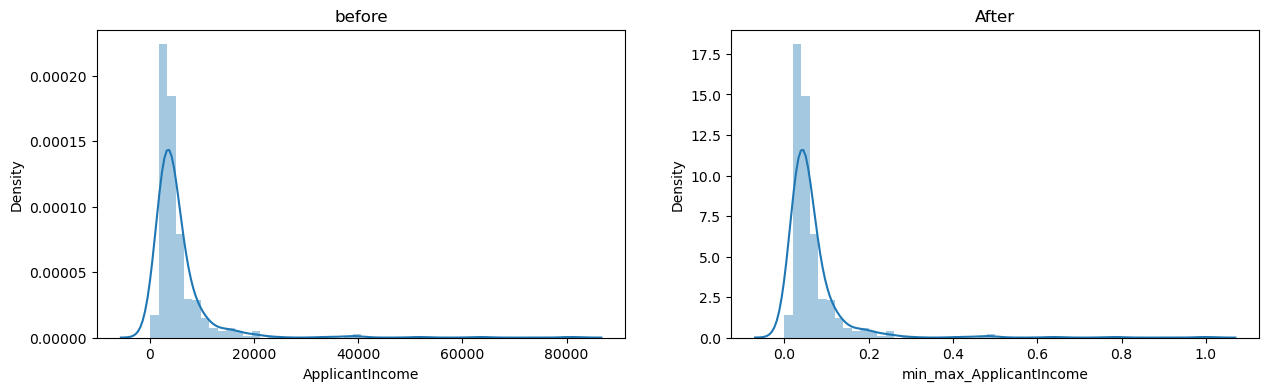

In [43]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(dataset["ApplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["min_max_ApplicantIncome"])
plt.show()